## SI 670 Applied Machine Learning, Week 3:  Regularization, Logistic Regression, and Evaluation.

In [2]:
# if you haven't installed graphviz you can install by:
# %pip install graphviz

In [3]:
# # # run this cell if you are using Colab

# !rm -rf CommViolPredUnnormalizedData.txt

# import io
  

# from google.colab import files as colab_files
# uploaded = colab_files.upload()
# files = {'CommViolPredUnnormalizedData.txt': io.BytesIO(uploaded['CommViolPredUnnormalizedData.txt'])}

# # # upload 'CommViolPredUnnormalizedData.txt' and 'adspy_shared_utilities.py'

In [4]:
# run this cell if you are using Jupyter
files = {'CommViolPredUnnormalizedData.txt': 'CommViolPredUnnormalizedData.txt'}

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_csv(files['CommViolPredUnnormalizedData.txt'], sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

(X_crime, y_crime) = load_crime_dataset()
print(X_crime.shape)
X_train, X_test, y_train, y_test = train_test_split(np.array(X_crime), np.array(y_crime), random_state=0)

(1994, 88)


### (Review) Feature scaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regrularization

### Linear regression without regularizations

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train_scaled, y_train)

print('linear regression linear model intercept: {}'
     .format(linreg.intercept_))
print('linear regression linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linreg.coef_ != 0)))

linear regression linear model intercept: -17544553548321.275
linear regression linear model coeff:
[ 5.62638067e+03 -2.74423921e+02  6.28535676e+02 -1.87436123e+03
 -3.96678206e+00 -7.87883737e+02 -8.45960109e+03  1.53006344e+02
 -1.55966194e+03 -4.33523545e+02  1.44214577e+02 -4.58956570e+02
  6.29504995e+02  5.41347469e+00 -3.12598109e+02  1.13498616e+03
  2.54255165e+02  3.08821141e+03 -2.15048434e+02 -7.51055338e+02
  5.94148624e+02 -3.55613503e+01 -3.21250725e+01  4.88438224e+02
 -1.81507941e+02 -1.86517383e+02  1.83345351e+02  5.20851132e+02
  2.77506171e+03  7.59598485e+02  3.03946810e+03 -5.36674063e+03
 -2.89661683e+02  4.28198429e+01 -1.58466790e+03  1.89857397e+02
  2.54277450e+01  2.78891421e+02 -5.04648321e+02 -1.04460745e+03
  1.00148039e+03 -1.55355794e+03  7.62441183e+01  1.33616347e+02
 -2.97661193e+02  1.40518811e+02 -1.09302052e+02 -7.56467412e+02
  1.20136935e+03 -8.18412247e+02 -2.67833041e+01 -1.33169109e+03
  5.94004796e+02 -1.31999637e+03  1.87755324e+03  2.894

### Ridge regression

In [8]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=1).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 1104.4416090098575
ridge regression linear model coeff:
[ 7.54103315e+00  6.05533534e+01  4.95857048e+01 -5.06762423e+02
 -1.05074422e+02 -8.90875685e+01 -1.47861600e+01  1.08287224e+02
 -3.35407905e+00 -2.07215353e+02  4.05544113e+01 -4.09980554e+02
  1.76784594e+02  2.95169733e+01 -2.43571550e+02  3.20442712e+01
  1.09728123e+02  8.47949301e+01 -1.37514400e+02 -5.07132696e+02
  3.75662960e+02  3.27927188e+01 -8.74184067e+01  2.51366206e+02
 -1.78240455e+02 -1.32406198e+02  9.21475863e+01  2.41486320e+02
  3.09855655e+02  3.73686225e+02 -1.93578201e+02 -9.05316742e+01
  2.78740533e+02 -3.24734991e+02 -9.23148836e+02  3.14649682e-01
 -3.31087275e+01  1.58055639e+02 -4.11267101e+02  4.86011642e+01
  1.10593134e+03 -3.03665711e+02  8.08130727e+01 -4.71340777e+01
 -1.29103577e+02  7.65538294e+01 -1.19250913e+02 -7.31803132e+01
  8.02849167e+01  1.17467073e+02  1.20725443e+02 -5.53129475e+02
 -9.48578551e+00 -2.46241792e+02  2.82947909e+02 -1.177273

#### (Excercise) Try different alphas for Ridge regression. 
When alpha goes up, the number of large coefficients tends to go down. 

In [10]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [1e-8, 1, 5, 50, 100, 500]:  # By setting alpha close to 0, `Ridge` behaves similar as `LinearRegression`.
    
    linridge = Ridge(alpha = this_alpha)
    
    # %%% Your code: fit linridge with X_train_scaled and y_train
    linridge.fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)  # %%% Your code: get r2_train by the linridge.score on training data
     
    # %%% Your code: get r2_train by the linridge.score on training data
    r2_train = linridge.score(X_train_scaled, y_train)  # %%% Your code: get r2_train by the linridge.score on training data 
    
    # %%% Your code: get r2_train by applying the linridge.score on test data
    r2_test = linridge.score(X_test_scaled, y_test)  # %%% Your code: get r2_train by applying the linridge.score on test data    
    
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 10.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 10.0: {}, \
r-squared training: {:.3f}, r-squared test: {:.3f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 10.0: 84, r-squared training: 0.673, r-squared test: 0.496

Alpha = 1.00
num abs(coeff) > 10.0: 84, r-squared training: 0.660, r-squared test: 0.560

Alpha = 5.00
num abs(coeff) > 10.0: 82, r-squared training: 0.642, r-squared test: 0.583

Alpha = 50.00
num abs(coeff) > 10.0: 74, r-squared training: 0.584, r-squared test: 0.583

Alpha = 100.00
num abs(coeff) > 10.0: 72, r-squared training: 0.551, r-squared test: 0.551

Alpha = 500.00
num abs(coeff) > 10.0: 68, r-squared training: 0.404, r-squared test: 0.400



### (Question) Do you find any difference between the trends of training and test R2 scores? Can you tell the overfitting and underfitting regimes?

### (Exercise) Lasso
You will see in the Lasso case, there will be coefficients being shrinked to exactly zero.

In [11]:
from sklearn.linear_model import Lasso

# %%% Your code: create a Lasso model with alpha=1.0 and fit it
linlasso = Lasso(alpha=1.0).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 1373.2284805319682
lasso regression linear model coeff:
[    0.             0.            -0.          -361.09407339
    -0.             0.             0.           109.2120849
     0.            -0.             0.          -282.24690049
     0.            -0.           -95.54527311     0.
     0.             0.            -0.           -92.32116317
     0.            -0.            -0.             0.
   -89.04207429    -0.            -0.             0.
   187.93139715     0.             0.             0.
     0.            -0.         -1221.70871412    -0.
    -0.            -0.          -233.54413692     0.
  1479.1847506     -0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.             0.            -0.
     0.             0.             0.             0.
     0.             0.           370.79879828     6.10409026
     0.           755.51120919   -10.47181439     0.
   202.9137892  

#### Try different alphas for Lasso
When alpha goes up, the number of non-zero coefficients tends to go down. 


In [12]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.3f}, \
r-squared test: {:.3f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.650, r-squared test: 0.581

Alpha = 1.00
Features kept: 25, r-squared training: 0.641, r-squared test: 0.605

Alpha = 2.00
Features kept: 20, r-squared training: 0.631, r-squared test: 0.624

Alpha = 3.00
Features kept: 17, r-squared training: 0.618, r-squared test: 0.627

Alpha = 5.00
Features kept: 12, r-squared training: 0.601, r-squared test: 0.614

Alpha = 10.00
Features kept: 6, r-squared training: 0.567, r-squared test: 0.578

Alpha = 20.00
Features kept: 2, r-squared training: 0.509, r-squared test: 0.504

Alpha = 50.00
Features kept: 1, r-squared training: 0.313, r-squared test: 0.302



Do you find any difference between the trends of training and test R2 scores? Can you tell overfitting and underfitting regimes?

### Robust regression

In [13]:
from sklearn.linear_model import HuberRegressor, RANSACRegressor

print("Using original data:\n")

model = LinearRegression().fit(X_train_scaled, y_train)
print("---------------LinearRegression---------------")
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(model.score(X_test_scaled, y_test)))

model = HuberRegressor().fit(X_train_scaled, y_train)
print("---------------HuberRegressor---------------")
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(model.score(X_test_scaled, y_test)))

print("\n\nUsing data with outliers:\n")


y_train_corrupted = y_train.copy()
y_train_corrupted[:5] += y_train.max() * 5

model = LinearRegression().fit(X_train_scaled, y_train_corrupted)
print("---------------LinearRegression---------------")
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train_scaled, y_train_corrupted)))
print('R-squared score (training, outliers removed): {:.3f}'
     .format(model.score(X_train_scaled[5:], y_train_corrupted[5:])))
print('R-squared score (test): {:.3f}'
     .format(model.score(X_test_scaled, y_test)))

model = HuberRegressor().fit(X_train_scaled, y_train_corrupted)
print("---------------HuberRegressor---------------")
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train_scaled, y_train_corrupted)))
print('R-squared score (training, outliers removed): {:.3f}'
     .format(model.score(X_train_scaled[5:], y_train_corrupted[5:])))
print('R-squared score (test): {:.3f}'
     .format(model.score(X_test_scaled, y_test)))


Using original data:

---------------LinearRegression---------------
R-squared score (training): 0.673
R-squared score (test): 0.496
---------------HuberRegressor---------------
R-squared score (training): 0.643
R-squared score (test): 0.504


Using data with outliers:

---------------LinearRegression---------------
R-squared score (training): 0.165
R-squared score (training, outliers removed): 0.511
R-squared score (test): 0.367
---------------HuberRegressor---------------
R-squared score (training): 0.121
R-squared score (training, outliers removed): 0.646
R-squared score (test): 0.569


/Users/peilinqiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/peilinqiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Logistic Regression

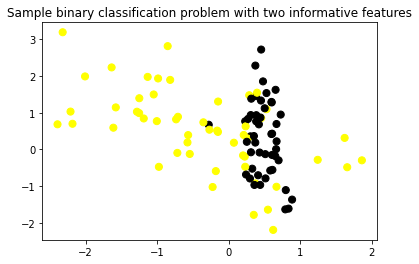

In [14]:
from sklearn.datasets import make_classification
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


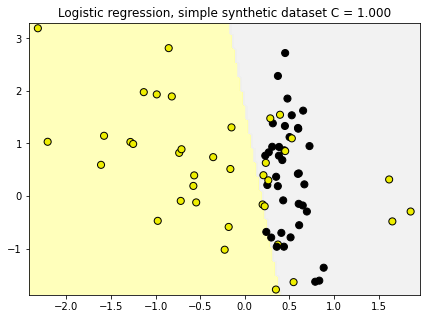

In [15]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     

#### (Exercise) Try different C for LogisticRegression

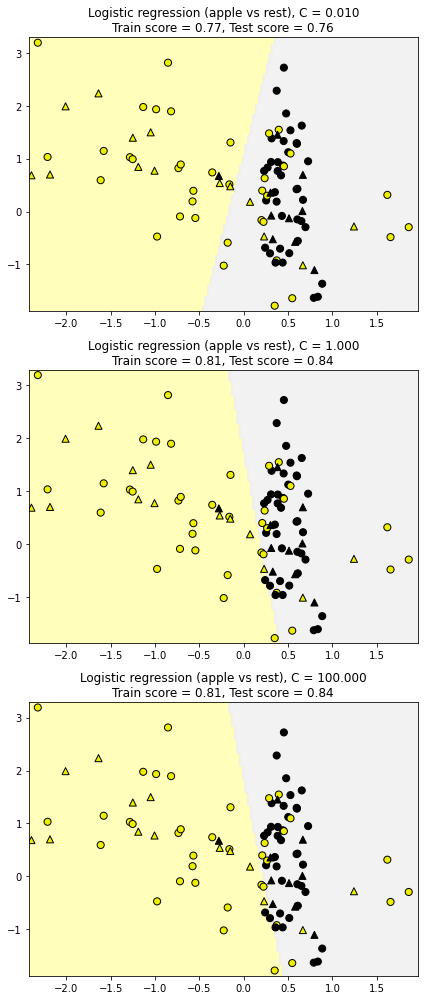

In [17]:
fig, subaxes = plt.subplots(3, 1, figsize=(6, 14))

for this_C, subplot in zip([0.01, 1, 100], subaxes):
    # clf = %%% Your code: create a LogisticRegression model with regularization parameter as `this_C`
    clf = LogisticRegression(C=this_C)  # %%% Your code: create a LogisticRegression model with regularization parameter as `this_C`
    clf.fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

### (Exercise) Apply to a real dataset breast_cancer

In [18]:
from sklearn.datasets import load_breast_cancer
X_cancer, y_cancer = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0) # %%% Your code: split (X_cancer, y_cancer) using train_test_split with random_state=0
clf = LogisticRegression().fit(X_train, y_train)  # %%% Your code: create a LogisticRegression model and fit it

print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.94


/Users/peilinqiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

#### Digits dataset

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


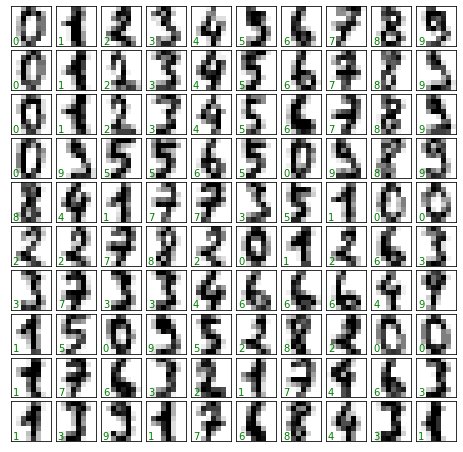

In [20]:
# visualize a sample of digits
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(dataset.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(dataset.target[i]),
            transform=ax.transAxes, color='green')

In [21]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])
print('Class count:', np.bincount(y_binary_imbalanced))    # Negative class (0) is the most frequent class

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Class count: [1615  182]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Support Vector Machine classifier (a sophisticated classifier, will be covered later)
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

#### (Question) Is 0.909 a high accuracy score?

In [23]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

print("dummy classifier predictions:")
print(y_dummy_predictions)
print("dummy classifier score: ", dummy_majority.score(X_test, y_test))

dummy classifier predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
dummy classifier score:  0.9044444444444445


In [24]:
# changing the support vector machine kernel gives better performance
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

In [25]:
# logistic regression also gives better performance
model = LogisticRegression().fit(X_train, y_train)
model.score(X_test, y_test)

/Users/peilinqiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9688888888888889

### Confusion matrices

#### Binary (two-class) confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [27]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[366  41]
 [ 39   4]]


#### (Exercise) Fit a LogisticRegression model and print its confusion matrix

In [28]:
# %%% Your code here
lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


/Users/peilinqiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation metrics for binary classification

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predicted)))

Accuracy: 0.97
Precision: 0.85
Recall: 0.81
F1: 0.83


/Users/peilinqiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg       0.97      0.97      0.97       450



#### (Exercise) Print the classification report of the dummy classifier with strategy='stratified'

In [32]:
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)

y_classprop_predicted = dummy_classprop.predict(X_test)  # %%% Your code: generate predictions

report = classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1'])
print('Random class-proportional (dummy)\n', report)

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.90      0.90       407
           1       0.09      0.09      0.09        43

    accuracy                           0.83       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.83      0.83      0.83       450



### Precision-recall curves


In [33]:
# decision function
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
lr = LogisticRegression()
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

/Users/peilinqiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828788397459544),
 (0, -19.382924463016092),
 (0, -29.198335971511245),
 (0, -21.74618001653433),
 (0, -22.64239695643507),
 (0, -11.806008824482591),
 (1, 6.496016101958519),
 (0, -23.35456573474073),
 (0, -27.543457028457546),
 (0, -26.888219273803482),
 (0, -31.862705400942506),
 (0, -22.486128745388815),
 (0, -25.31800049572696),
 (0, -13.384561823323631),
 (0, -13.565610167490854),
 (0, -13.308401806399631),
 (1, 12.180787064623969),
 (0, -34.36249041558923),
 (0, -13.231505283967257),
 (0, -29.593937017190914)]

<ipython-input-34-2df46f6198e5>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


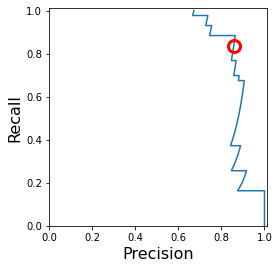

In [34]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### (Exercise) Plot ROC curves and calculate Area-Under-Curve (AUC)

/Users/peilinqiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-35-264b10ca208c>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


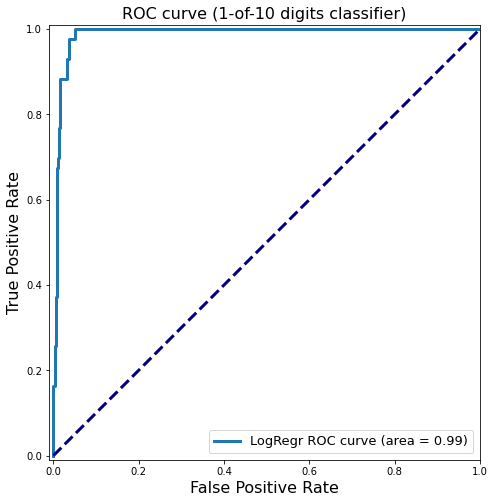

In [35]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
lr = LogisticRegression()
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score_lr)  # %%% Your code: use `roc_curve` function to get fpr and tpr
roc_auc = auc(fpr, tpr)  # %%% Your code: use `auc` function to calculate roc_auc based on fpr and tpr

plt.figure(figsize=(8, 8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

## Model Selection

In previous labs we have been investigating how various hyper-parameters (e.g., alpha in Ridge or C in the Logistic Regression) affect the model performance. At the end of this lecture, we have made it clear that the hyper-parameters should be selected based on a validation set rather than the test set. Here let's practice the "Training, Validation, and Test Framework". 

We will use cross validation on the training data to select the hyper-parameter C for the LogisticRegression model.

### (Exercise) Select C for LogisticRegression with cross-validation

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Train test split
X_train, X_test, y_train, y_test = train_test_split(np.array(X_crime), np.array(y_crime), random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

r2_scores = []
param_range = [1e-8, 1, 5, 50, 100]
for this_alpha in param_range:
    
    # %%% Your code: create a Ridge regression model with alpha=this_alpha
    model = Ridge(alpha=this_alpha)

    # %%% Your code: cross validation on training data, cv=5
    r2 = cross_val_score(model, X_train, y_train, cv=5)
    r2_scores.append(np.mean(r2))

this_alpha = param_range[np.argmax(r2_scores)]
print("r2_scores:", r2_scores)

# %%% Your code: report the model performance with this_alpha
model = Ridge(alpha=this_alpha).fit(X_train, y_train)
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test_scaled, y_test) 

print('Alpha = {:.2f}\nr-squared training: {:.3f}, r-squared test: {:.3f}\n'
         .format(this_alpha, r2_train, r2_test))

r2_scores: [0.6027557763134708, 0.6251530674468377, 0.6167961196272517, 0.5625505864152742, 0.5264031078906128]
Alpha = 1.00
r-squared training: 0.660, r-squared test: 0.560



## (Optional) Open question: regularized logistic regression vs KNN on high dimensional data

In the open question of lab 1, we have explored how the data dimension influence the performance of KNN. Specifically, we showed that KNN does not work well in the high dimensional case. In this question, you are asked to explore how different feature dimension affects k-NN with different k and LogisticRegression with different C.

In [37]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

First, let's start by generating some synthetic data!

In [38]:
# generate n synthetic data points from [0, 1]^d; label is positive if x_1 + noise > 0.5
RANDOM_STATE = np.random.RandomState(0)
def generate_data(n, d):
    X = RANDOM_STATE.uniform(size=(n, d))
    y = (X[:, 0] + RANDOM_STATE.normal(loc=0, scale=0.2, size=(n,)) > 0.5).astype(int)
    return X, y

Let's say we have 500 data points with a variety of dimentions.

In [39]:
n = 500  # number of data samples
dimension_range = [1, 5, 10, 20, 50, 100, 1000] # range of feature dimension to explore

Now is your turn.

/Users/peilinqiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/peilinqiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Text(0, 0.5, 'Accuracy')

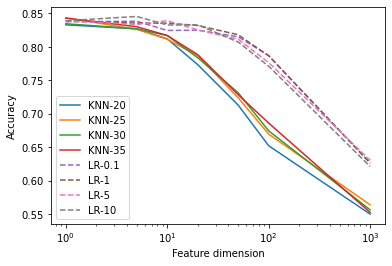

In [40]:
# %%% Your code: design and implement experiments to explore how feature dimension affects k-NN with different k and LogisticRegression with different C
plt.figure()
    
for k in range(20, 40, 5):
    knn = KNeighborsClassifier(n_neighbors=k)

    results = []
    for d in dimension_range:
        scores = []
        for i in range(100):
            X, y = generate_data(n, d)
            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
            knn.fit(X_train, y_train)
            scores.append(knn.score(X_test, y_test))
        results.append(np.mean(scores))
    plt.semilogx(dimension_range, results, label="KNN-{}".format(k))

for C in [0.1, 1, 5, 10]:
    model = LogisticRegression(C=C)

    results = []
    for d in dimension_range:
        scores = []
        for i in range(100):
            X, y = generate_data(n, d)
            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))
        results.append(np.mean(scores))
    plt.semilogx(dimension_range, results, "--", label="LR-{}".format(C))

plt.legend()    
plt.xlabel('Feature dimension')
plt.ylabel('Accuracy')